In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [276]:
df = pd.read_json('data_with_lyrics.json')

In [277]:
df_audio = df.apply(lambda x: pd.Series(x['audio_features'][0]), axis=1)
df_audio = df_audio[['danceability','instrumentalness','speechiness','acousticness', 'valence', 'loudness','energy']]
df = df.join(df_audio)
df = df.drop('audio_features', axis=1)

In [278]:
df[(df['energy'] > 0.8) & (df['valence'] > 0.8)].head().drop('lyrics', axis=1)

,added_at,name,artist,artist_id,genres,uri,danceability,instrumentalness,speechiness,acousticness,valence,loudness,energy
23,2020-05-22 15:40:07+00:00,A Little Bit Off,Five Finger Death Punch,5t28BP42x2axFnqOOMg3CM,"alternative metal,groove metal,nu metal,post-g...",spotify:track:6GqqGv8frU7kqzXkm2rewI,0.664,0.000000,0.0404,0.00839,0.820,-6.053,0.828
150,2019-05-17 06:48:25+00:00,White Lies - EP Version,Max Frost,7r8xR0LmnaAM623MmRDn1V,"austindie,indie pop,indie poptimism,indietroni...",spotify:track:6sS0cYdBJCjTW9pgitwsCk,0.695,0.000000,0.0441,0.15300,0.969,-3.429,0.878
212,2018-11-25 09:19:15+00:00,Get up and Fight,Muse,12Chz98pHFMPJEknJQMWvI,"modern rock,permanent wave,post-grunge,rock",spotify:track:7lvZfms8Bh8QnThBmFTD7a,0.646,0.000014,0.0356,0.00430,0.870,-5.654,0.846
218,2018-11-25 09:19:15+00:00,Pressure (feat. UCLA Bruin Marching Band),Muse,12Chz98pHFMPJEknJQMWvI,"modern rock,permanent wave,post-grunge,rock",spotify:track:1DqoQsvOtn23gDx6Up6cX5,0.631,0.000046,0.0551,0.49600,0.807,-2.656,0.947
235,2018-10-30 07:43:58+00:00,Body Talks (feat. Kesha),The Struts,3lDpdwM8KILepMHqBWUhIA,"glam rock,modern alternative rock,modern rock",spotify:track:6lsniCxgY5bSJLKrhX1qSN,0.537,0.000000,0.2620,0.00628,0.848,-3.439,0.919


In [279]:
mean_audio_feature_year = df.groupby(df['added_at'].dt.year).agg(['mean'])
mean_audio_feature_year

,danceability,instrumentalness,speechiness,acousticness,valence,loudness,energy
,mean,mean,mean,mean,mean,mean,mean
added_at,,,,,,,
2014,0.455583,0.115916,0.086256,0.183211,0.287926,-9.111109,0.655072
2015,0.458054,0.051940,0.067189,0.041197,0.415687,-5.225339,0.846379
2016,0.447454,0.119549,0.064983,0.046745,0.378760,-5.369720,0.837145
2017,0.466131,0.079110,0.065788,0.045420,0.380760,-5.749069,0.815115
2018,0.480916,0.073268,0.067740,0.081456,0.379687,-5.718181,0.786094
2019,0.496411,0.112275,0.059315,0.112497,0.373829,-6.288841,0.753841
2020,0.514036,0.066226,0.055189,0.124963,0.403061,-6.746083,0.716167


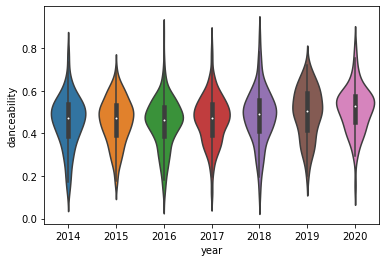

In [280]:
df['year'] = df['added_at'].dt.year
sns.violinplot(data=df, x ='year', y='danceability')

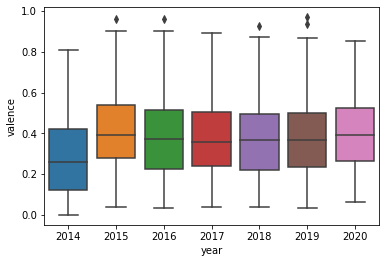

In [281]:
sns.boxplot(data=df, x ='year', y='valence')

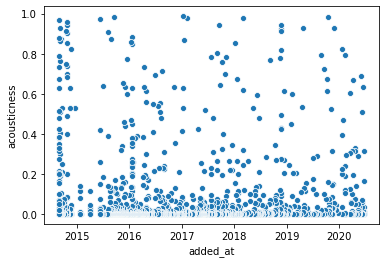

In [282]:
sns.scatterplot(data=df, x='added_at', y='acousticness')

## Genres

In [283]:
def top_genres(df, n=5):
    genres = df['genres'].str.cat(sep=",").split(",")
    # Remove empty
    genres = [g for g in genres if g]
    # Return head(n):
    return pd.Series(genres).value_counts()

In [284]:
genres_per_year = pd.DataFrame({
    2020 : top_genres(df[df['year'] == 2020]),
    2019 : top_genres(df[df['year'] == 2019]),
    2018 : top_genres(df[df['year'] == 2018]),
    2017 : top_genres(df[df['year'] == 2017]),
    2016 : top_genres(df[df['year'] == 2016]),
    2015 : top_genres(df[df['year'] == 2015]),
# 2014 : top_genres(df[df['year'] == 2014]),
})
genres_per_year.dropna(0, inplace=True)

In [285]:
genres_per_year = genres_per_year.apply(lambda x: x/x.sum()*100)
todrop = genres_per_year.apply(lambda x: x.median() > 5, axis=1)
genres_per_year = genres_per_year.loc[todrop.values,:]

In [286]:
genres_per_year_melt = genres_per_year.reset_index().melt(id_vars='index')
genres_per_year_melt.columns = ['genre', 'year', 'count']


The graph below shows that my music taste changed over the years. It seems that I like more 'modern alternative rock' and am not that much into 'nu metal'. The green line shows 'modern rock' which is probably related to the 'modern alternative rock' category.

Text(0, 0.5, 'Percentage of genre added')

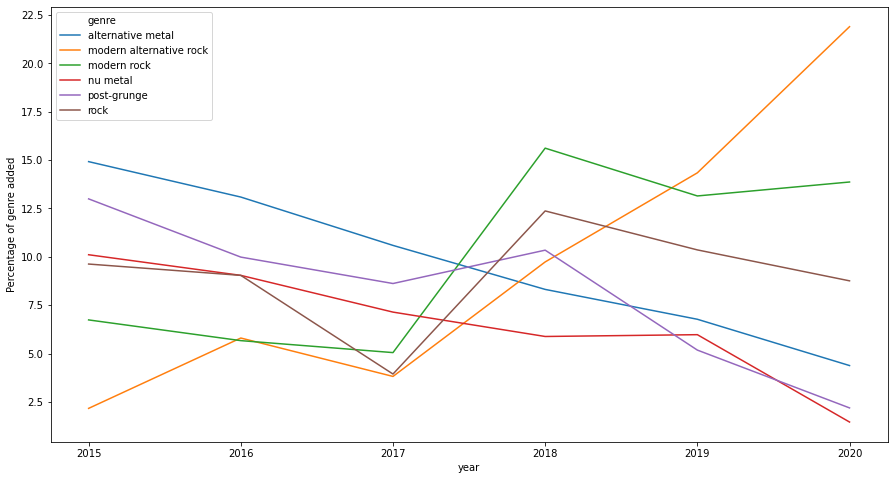

In [287]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=genres_per_year_melt, x='year', y='count', hue='genre')
ax.set_ylabel('Percentage of genre added')

In [288]:
sid = SentimentIntensityAnalyzer()

df_lyrics = df[df['lyrics'] != ""]
df_lyrics['sentiment'] = df_lyrics.apply(lambda x: sid.polarity_scores(x['lyrics'])['compound'], axis=1)

In [289]:
sorted_sentiment = df_lyrics[['artist', 'name', 'sentiment']].sort_values('sentiment')
sorted_sentiment.head(10)

,artist,name,sentiment
1474,Machine Head,Game Over,-0.9996
854,Metallica,"Atlas, Rise!",-0.9995
162,Badflower,Murder Games,-0.9995
278,PVRIS,What's Wrong,-0.9995
391,Marilyn Manson,KILL4ME,-0.9994
1213,Dead Sara,Weatherman,-0.9993
794,Demons & Wizards,Winter Of Souls,-0.9993
1763,Blind Guardian,Tanelorn (Into The Void),-0.9993
1453,Sister Sin,Chaos Royale,-0.9991
580,Godsmack,Dead And Broken,-0.9991


In [290]:
sorted_sentiment.tail(10)

,artist,name,sentiment
266,Mother Mother,Free,0.9982
1072,Me First and the Gimme Gimmes,Straight Up,0.9982
1519,Zico Chain,Mercury Gift,0.9984
1148,Halestorm,Get Lucky,0.9985
1638,Serj Tankian,Praise The Lord And Pass The Ammunition,0.9985
1671,Fall Out Boy,Uma Thurman,0.9989
82,Adia Victoria,Different Kind Of Love,0.9992
1601,Foo Fighters,Best of You,0.9995
1667,Fall Out Boy,Irresistible,0.9995
164,Badflower,We’re In Love,0.9997


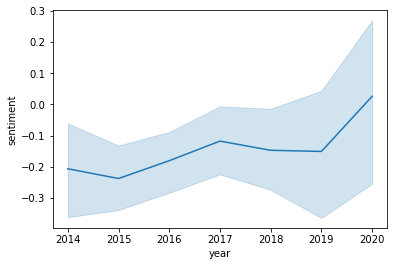

In [291]:
sns.lineplot(data=df_lyrics[['added_at', 'year', 'sentiment', 'artist']], y='sentiment', x='year')

In [292]:
sentiment_artist = df_lyrics.groupby(df_lyrics['artist']).agg(['mean'])['sentiment']
sentiment_artist.sort_values(by='mean').head(10)


,mean
artist,
Machine Head,-0.9996
Sister Sin,-0.9991
MAN WITH A MISSION,-0.9987
MILCK,-0.9986
Parasite Inc.,-0.9985
Dashboard Confessional,-0.9981
Frank Carter & The Rattlesnakes,-0.9981
Dust in Mind,-0.9980
Me And That Man,-0.9979


In [293]:
sentiment_artist.sort_values(by='mean').tail(10)

,mean
artist,
Chad Kroeger,0.9958
Paolo Nutini,0.9969
Sir Sly,0.9976
Turbowolf,0.9978
No Resolve,0.9979
The 1975,0.9980
Mother Mother,0.9982
Me First and the Gimme Gimmes,0.9982
Zico Chain,0.9984
